# Supervised Learning- Classification

In [330]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

##### Data Set Information
This data set includes votes for each of the U.S House of Representatives Congressmen on the 16 key votes identified by CQA. The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified ti nay), voted present, vote present to avoid confilict of intrest, and did not vote or otherwise make a position known (these three simplified to an unkown disposition)

Attributes definition:
    1. Class_names: Class Name: 2 (democrat, republicac)
    2. HI: handicapped infants: 2 (y/n)
    3. WPCS: water project cost sharing: 2(y/n)
    4. ABR: adoption of the budget resolution: 2 (y/n)
    5. PFF: physician fee freeze: 2 (y/n)
    6. ESA: el salvador aid: 2 (y/n)
    7. RGS: religious group in school: 2 (y,n)
    8. ASTB: anit satellite test ban: 2 (y,n)
    9. ANC: anti to nicaraguan-contras: 2 (y,n)
    10. MM: mix-missile: 2 (y,n)
    11. Immigration: immigration: 2 (y,n)
    12. SCC: synfuels coporation cutback: 2 (y,n)
    13.  ES: education spending: 2 (y,n)
    14. SRS: superfund right to sue: 2 (y,n)
    15. Crime: crime: 2 (y,n)
    16. DFE: duty free export: 2 (y,n)
    17. EAASA: export adminisration act south africa: 2 (y,n)

In [331]:
# Import Data Set
df_house_votes_84 = pd.read_csv("house-votes-84.csv")
df_house_votes_84.columns = ["Class_names", "HI", "WPCS", "ABR", "PFF",
                             "ESA", "RGS", "ASTB", "ANC", "MM", "Immigration", 
                             "SCC", "ES", "SRS", "Crime", "DFE", "EAASA"]
df_house_votes_84 = df_house_votes_84.replace(['y','n', '?'], [1,0, np.nan])

In [332]:
# Missing values
Missing_valid = df_house_votes_84.isnull().describe().T[["freq", "count"]]
Missing_valid["missing_data_%"] = (1-(Missing_valid["freq"]/Missing_valid['count']))*100
Missing_valid

,freq,count,missing_data_%
Class_names,434,434,0
HI,422,434,2.76498
WPCS,386,434,11.0599
ABR,423,434,2.53456
PFF,423,434,2.53456
ESA,419,434,3.45622
RGS,423,434,2.53456
ASTB,420,434,3.22581
ANC,419,434,3.45622
MM,412,434,5.06912


In [333]:
# Removed EAASA as its missing 24% of data
#df_home_votes_84 = df_house_votes_84.drop(columns = ["EAASA"])
df_house_votes = df_house_votes_84.dropna()

In [334]:
# Create array for the features and the response variable
y = df_house_votes['Class_names'].values
X = df_house_votes.drop('Class_names', axis = 1).values

# split data set into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size = 0.7, 
                                                    random_state = 42)


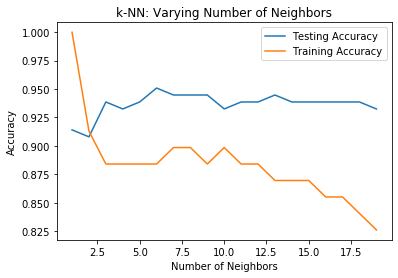

In [335]:
# Setput arrays to store train and test accuracies
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)
    

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [336]:
# Create a K-nn classfication wih 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    democrat       0.96      0.94      0.95        87
  republican       0.94      0.96      0.95        76

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163



In [340]:
Y = df_house_votes_84['Class_names'].values
x = df_house_votes_84.drop('Class_names', axis = 1).values


# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values = 'NaN',
                               strategy = 'most_frequent', axis = 0)),
                                #('scaler', StandardScaler()),
                                ('kNN', KNeighborsClassifier(n_neighbors = 6))]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create Traning and Test sets
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, 
                                                    random_state = 42)
# Fit the pipeline to the train set
pipeline.fit(x_train, y_train)

# Predict the labels of the train set
y_pred = pipeline.predict(x_test)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [338]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.96      0.89      0.92        83
  republican       0.83      0.94      0.88        48

    accuracy                           0.91       131
   macro avg       0.90      0.91      0.90       131
weighted avg       0.91      0.91      0.91       131

